In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
import pyro
import deepppl

In [4]:
import torch


### Basic example showing the interface of *DeepPPL*
The model impose a uniform prior to the bias of the coin and define each coin flip as a bernoulli distribution given the bias 


In [5]:
sns.set_style('whitegrid')

In [6]:
with open('../tests/good/coin.stan', 'r') as source:
    print(source.read())

data {
  int N;
  int<lower=0,upper=1> x[N];
}
parameters {
  real<lower=0,upper=1> z;
}
model {
  z ~ beta(1, 1);
  for (i in 1:N)
    x[i] ~ bernoulli(z);
}


In [7]:
model = deepppl.PyroModel(model_file = '../tests/good/coin.stan')

In [8]:
mcmc = model.mcmc(num_samples=500, warmup_steps=50)
mcmc.run(N=10, x=[0, 0, 0, 0, 0, 0, 1, 0, 0, 1])
serie = mcmc.get_samples()['z']

Sample: 100%|██████████| 500/500 [00:10, 49.00it/s, step size=5.07e-01, acc. prob=0.986]


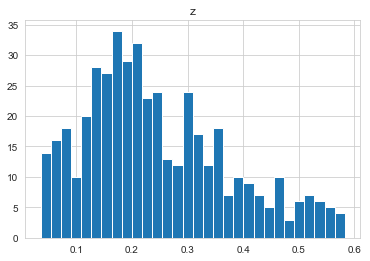

In [9]:
serie = pd.Series(mcmc.get_samples(), name = r'z')
serie.hist(bins=30)
plt.title(serie.name);